In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Create a time series of 100 points with trend + seasonality + noise
np.random.seed(0)
time = np.arange(100)
trend = -0.007 * time   # downward trend
seasonality = 0.05 * np.sin(time / 12) # yearly seasonality
noise = np.random.normal(0, 0.1, 100)
series = trend + seasonality + noise

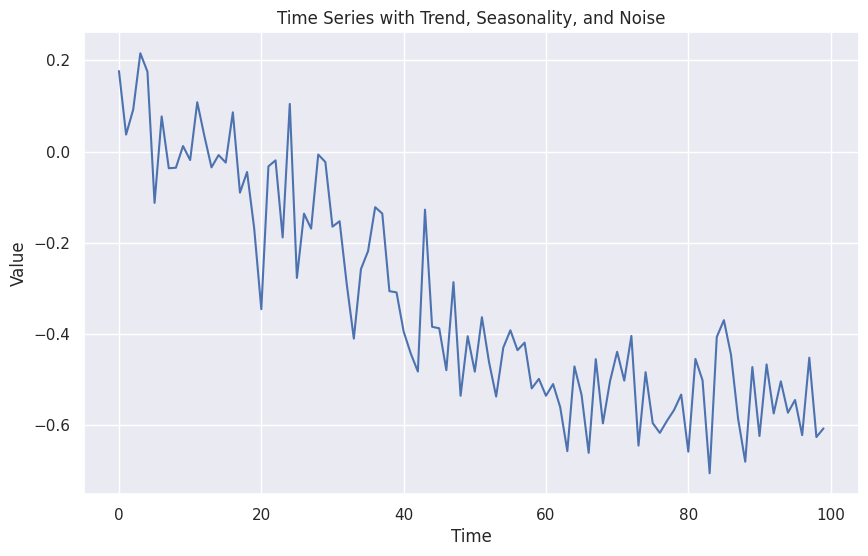

In [33]:
# plotting the series
plt.figure(figsize=(10, 6))
plt.plot(time, series)
plt.title('Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(series, period=12, model='additive')
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

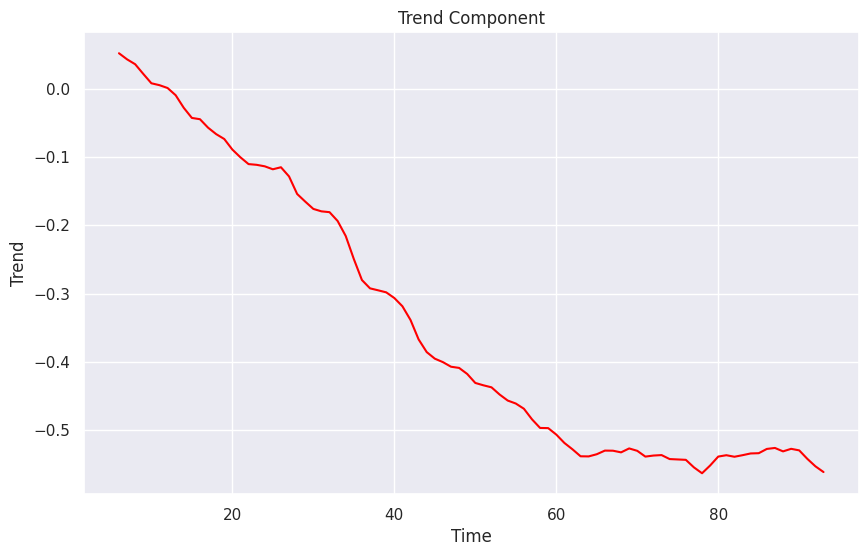

In [35]:
# plotting trend, seasonality, and residual
plt.figure(figsize=(10, 6))
plt.plot(trend,color='red')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.show()

/tmp/ipython-input-36-518017266.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


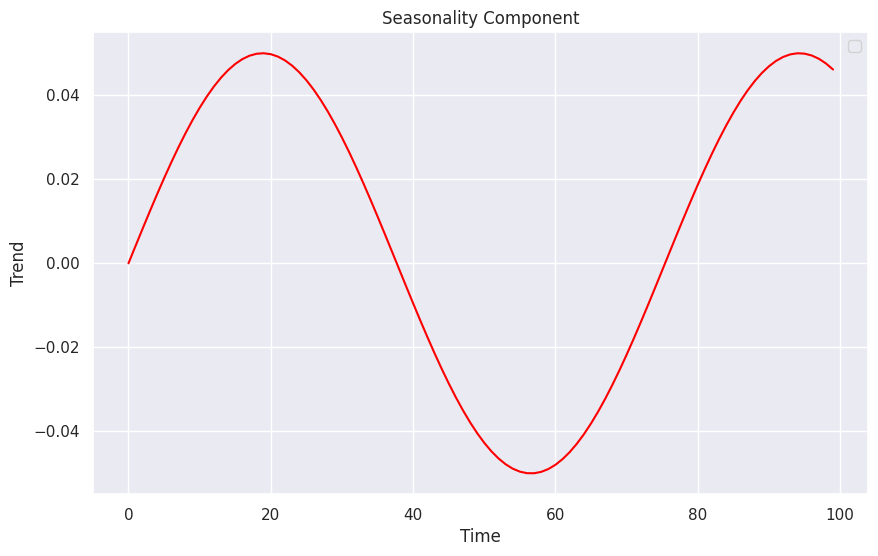

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(seasonality,color='red')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Seasonality Component')
plt.legend()
plt.show()

/tmp/ipython-input-37-659599784.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


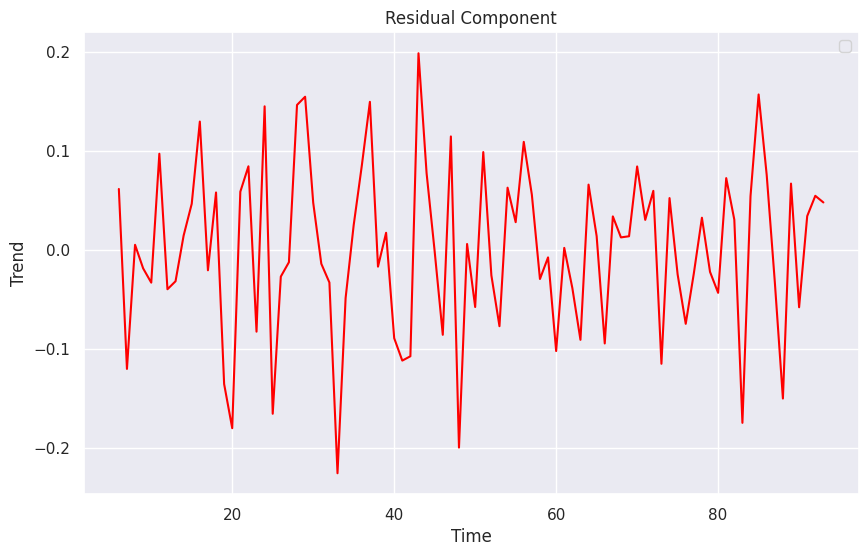

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(residual,color='red')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Residual Component')
plt.legend()
plt.show()

In [38]:
# ADF test to check for Stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.3892554668137547
p-value: 0.1447919663540243


## Since **p-value > 0.05**, ts is **NOT STATIONARY**

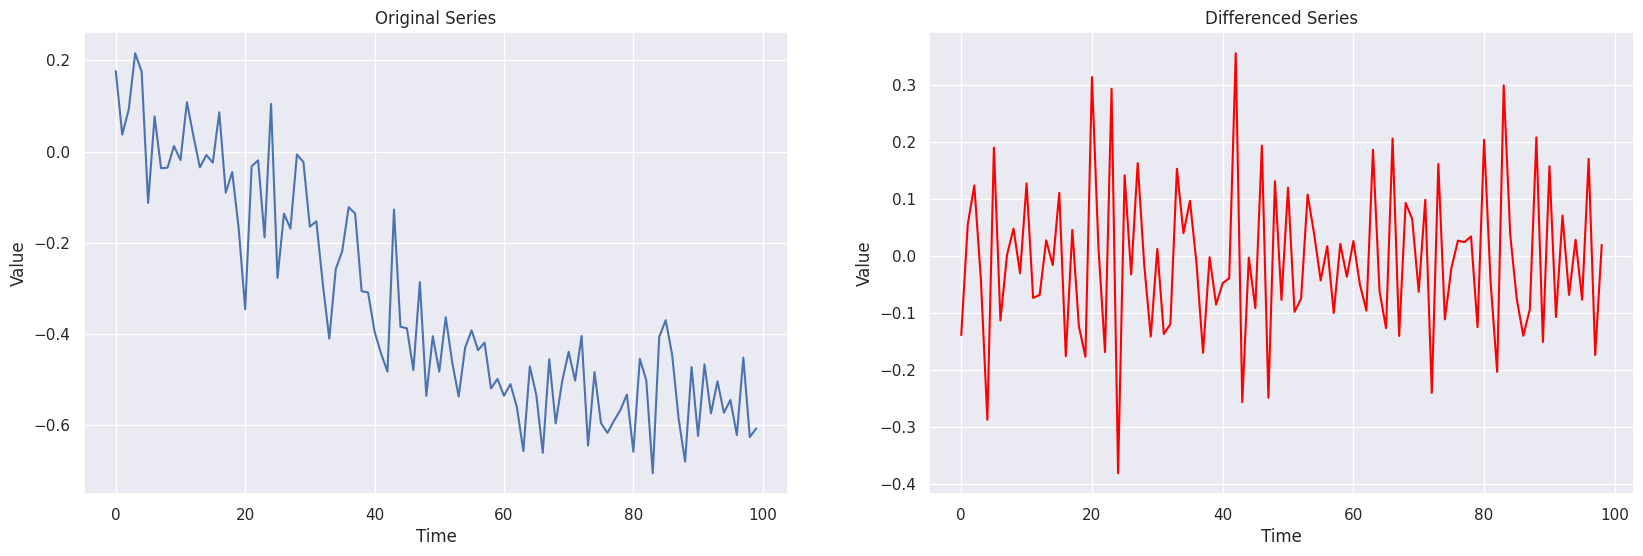

In [46]:
# removing trend using differencing
series_dff = np.diff(series)

# plotting series and series_dff
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(series)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Series')

plt.subplot(1,2,2)
plt.plot(series_dff,color='red')
plt.title('Differenced Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [47]:
# ADF test on series_dff
result = adfuller(series_dff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.748956951750407
p-value: 6.802763058495764e-05


# Now that p-value < 0.05, Time Series is noe STATIONARY